<a href="https://colab.research.google.com/github/Smehta1234/Multiclass-cnn/blob/main/multiclass_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-11-04 19:03:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.207, 142.250.157.207, 142.251.8.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  30.1MB/s    in 18s     

2024-11-04 19:03:30 (28.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

In [ ]:
train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

In [ ]:
# let get the class name
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

['3275256.jpg']
Image shape: (512, 512, 3)


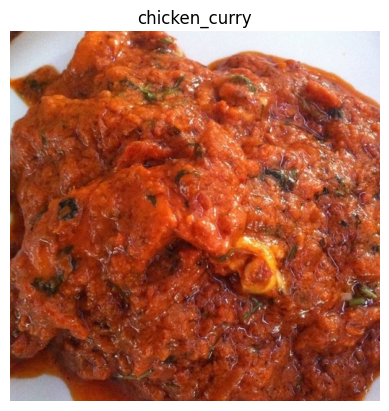

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

# preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# create a model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = test_data.samples // test_data.batch_size

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=test_data,
                        validation_steps=validation_steps)

Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.3564 - loss: 1.8521 - val_accuracy: 0.3590 - val_loss: 1.8329
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.3438 - loss: 2.1214 - val_accuracy: 0.0000e+00 - val_loss: 2.4038
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 26s 107ms/step - accuracy: 0.4417 - loss: 1.6754 - val_accuracy: 0.3650 - val_loss: 1.8270
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3750 - loss: 1.5792 - val_accuracy: 0.5000 - val_loss: 1.4500
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 36s 108ms/step - accuracy: 0.4894 - loss: 1.5298 - val_accuracy: 0.3618 - val_loss: 1.8508


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          67,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,132 (816.93 KB)

 Trainable params: 69,710 (272.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 139,422 (544.62 KB)

In [ ]:
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.3682 - loss: 1.8210


[1.8498846292495728, 0.3619999885559082]

In [ ]:
# plot the training and testing curve seperately
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

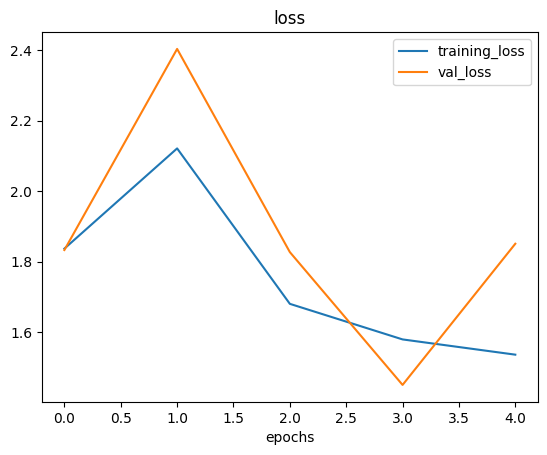

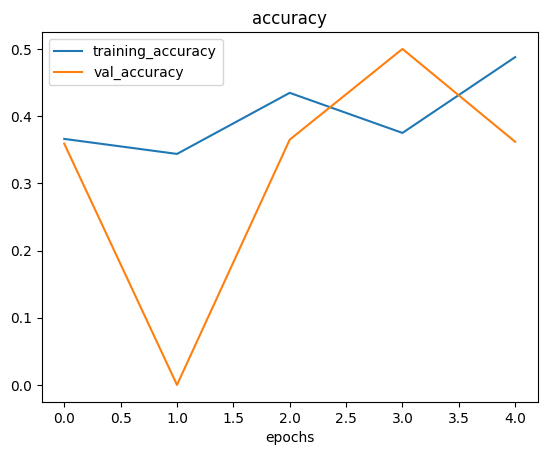

In [ ]:
plot_loss_curves(
    history_1
)

In [ ]:
# adjust the model hyperparameters to reduce overfitting
model_2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = test_data.samples // test_data.batch_size

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=test_data,
                        validation_steps=validation_steps)

Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 29s 113ms/step - accuracy: 0.1753 - loss: 2.3496 - val_accuracy: 0.2993 - val_loss: 1.9650
Epoch 2/5
  1/234 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.1875 - loss: 2.1021

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1875 - loss: 2.1021 - val_accuracy: 0.2500 - val_loss: 1.9207
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 38s 107ms/step - accuracy: 0.3672 - loss: 1.8659 - val_accuracy: 0.3337 - val_loss: 1.8751
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.1875 - loss: 2.0044 - val_accuracy: 0.0000e+00 - val_loss: 3.1180
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 26s 108ms/step - accuracy: 0.4862 - loss: 1.5510 - val_accuracy: 0.3169 - val_loss: 1.9724


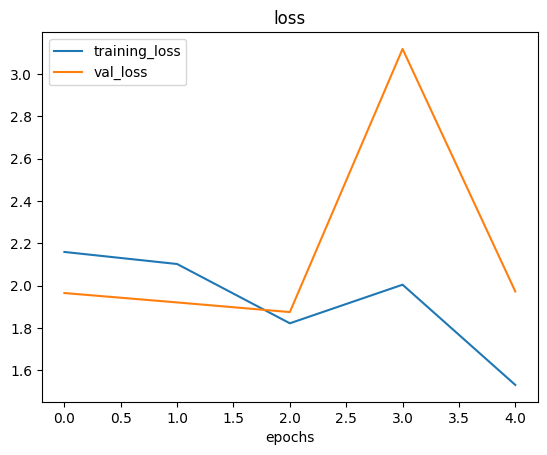

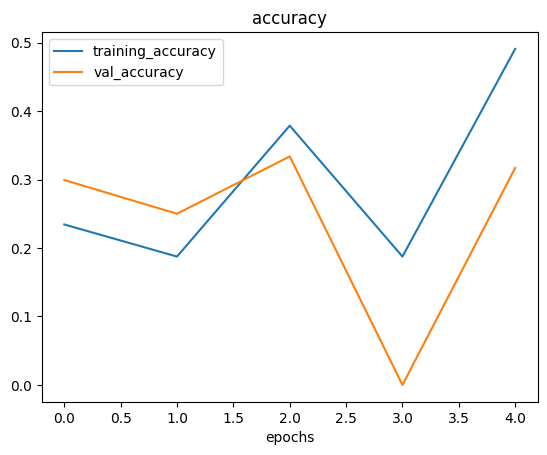

In [ ]:
plot_loss_curves(history_2)

In [ ]:
 # trying to reduce overfitting with data augmentation
 train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                     rotation_range=0.2,
                                     zoom_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip=True)

 train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
model_3 = tf.keras.models.clone_model(model_1)
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          67,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,710 (272.30 KB)

 Trainable params: 69,710 (272.30 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
steps_per_epoch = train_data_augmented.samples // train_data_augmented.batch_size
validation_steps = test_data.samples // test_data.batch_size

history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=test_data,
                        validation_steps=validation_steps)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


234/234 ━━━━━━━━━━━━━━━━━━━━ 100s 409ms/step - accuracy: 0.1457 - loss: 2.2647 - val_accuracy: 0.2668 - val_loss: 2.0503
Epoch 2/5
  1/234 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.1250 - loss: 2.1971

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1250 - loss: 2.1971 - val_accuracy: 0.0000e+00 - val_loss: 2.0697
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 139s 399ms/step - accuracy: 0.2530 - loss: 2.0923 - val_accuracy: 0.3229 - val_loss: 1.9519
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 85us/step - accuracy: 0.3125 - loss: 1.9772 - val_accuracy: 0.5000 - val_loss: 1.5690
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 141s 398ms/step - accuracy: 0.3180 - loss: 1.9891 - val_accuracy: 0.3678 - val_loss: 1.8512


In [ ]:
model_3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.3730 - loss: 1.8494


[1.850285530090332, 0.3684000074863434]